# Ερωτηση 3 | 3.Γ

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp 
from scipy import stats
from math import floor
%matplotlib inline

In [2]:
df_bus = pd.read_csv("business.csv") # Businesses Dataframe
df_red = pd.read_csv('RedfinPhila.tsv', sep='\t')

In [3]:
df_red = df_red[["median_sale_price", "region"]]
df_red["region"] = df_red.region.apply(lambda s: s.strip("Zip Code: "))
df_red.rename(columns = {'region':'postal_code'}, inplace = True)

print(df_red.shape)
df_red.head()

(45244, 2)


,median_sale_price,postal_code
0,252438.0,19070
1,580000.0,19078
2,219900.0,19043
3,55125.0,19124
4,69000.0,19124


In [4]:
df_bus.rename(columns = {'stars':'mean_star_rating'}, inplace = True)

We keep the most accurate mean_star_rating, star_x

In [5]:

df_bus = df_bus[["business_id", "mean_star_rating", "postal_code"]]
df_bus.shape

(11070, 3)

In [6]:
df_bus = df_bus.fillna(0)

In [7]:
df_bus["postal_code"] = df_bus["postal_code"].astype(int)
df_bus["postal_code"] = df_bus["postal_code"].astype(str)
df_bus.head()

,business_id,mean_star_rating,postal_code
0,MTSW4McQd7CbVtyjqoe9mw,4.0,19107
1,MUTTqe8uqyMdBl186RmNeA,4.0,19106
2,ROeacJQwBeh05Rqg7F6TCg,4.5,19147
3,QdN72BWoyFypdGJhhI5r7g,4.0,19147
4,Mjboz24M9NlBeiOJKLEd_Q,3.0,19127


In [8]:
df_red_bus = df_red.merge(df_bus, on="postal_code")
print(df_red_bus.shape)
df_red_bus.head()

(5562530, 4)


,median_sale_price,postal_code,business_id,mean_star_rating
0,55125.0,19124,O1oZpbZNDMH_gz8DhsZCdA,1.5
1,55125.0,19124,tUl_Lq8dM3T-NnM-u3szSg,5.0
2,55125.0,19124,yFqq66GxRjnhZXPgjA6hnw,2.0
3,55125.0,19124,tVxL-Ygzwp8NMuxwvNmWRA,4.0
4,55125.0,19124,zUJMvjK6aBeQtVCowZ85-w,3.5


In [9]:
businesses_counts = df_red_bus.groupby(by="postal_code")["business_id"].count()
print(businesses_counts.shape)
businesses_counts.head()

(52,)


postal_code
19003       586
19010       556
19014       544
19023       508
19102    151455
Name: business_id, dtype: int64

In [10]:
pc_mean_star_rating = df_red_bus.groupby(by="postal_code")["mean_star_rating"].mean()
print(pc_mean_star_rating.shape)
pc_mean_star_rating.head()

(52,)


postal_code
19003    4.000000
19010    4.500000
19014    3.500000
19023    2.000000
19102    3.677677
Name: mean_star_rating, dtype: float64

In [11]:
pc_count_rating = pd.DataFrame()
pc_count_rating["businesses_count"] = businesses_counts
pc_count_rating["mean_star_ratings"] = pc_mean_star_rating
print(pc_count_rating.shape)
pc_count_rating.head()

(52, 2)


,businesses_count,mean_star_ratings
postal_code,,
19003,586,4.000000
19010,556,4.500000
19014,544,3.500000
19023,508,2.000000
19102,151455,3.677677


In [12]:
df_red.index = df_red.postal_code
df_red = df_red[["median_sale_price"]]
print(df_red.shape)
df_red.head()

(45244, 1)


,median_sale_price
postal_code,
19070,252438.0
19078,580000.0
19043,219900.0
19124,55125.0
19124,69000.0


In [13]:
df_red.head()

,median_sale_price
postal_code,
19070,252438.0
19078,580000.0
19043,219900.0
19124,55125.0
19124,69000.0


In [14]:
df_red = df_red.groupby(by=df_red.index)["median_sale_price"].mean()
print(df_red.shape)
df_red.head()

(106,)


postal_code
19003    348269.932594
19008    309258.622892
19010    469248.786871
19013     52576.980159
19014    207546.861213
Name: median_sale_price, dtype: float64

In [15]:
pc_count_rating = pc_count_rating.merge(df_red, on="postal_code")
pc_count_rating.rename(columns = {'median_sale_price':'mean_sale_price'}, inplace = True)
print(pc_count_rating.shape)
pc_count_rating.head()

(52, 3)


,businesses_count,mean_star_ratings,mean_sale_price
postal_code,,,
19003,586,4.000000,348269.932594
19010,556,4.500000,469248.786871
19014,544,3.500000,207546.861213
19023,508,2.000000,80747.046260
19102,151455,3.677677,596292.791304


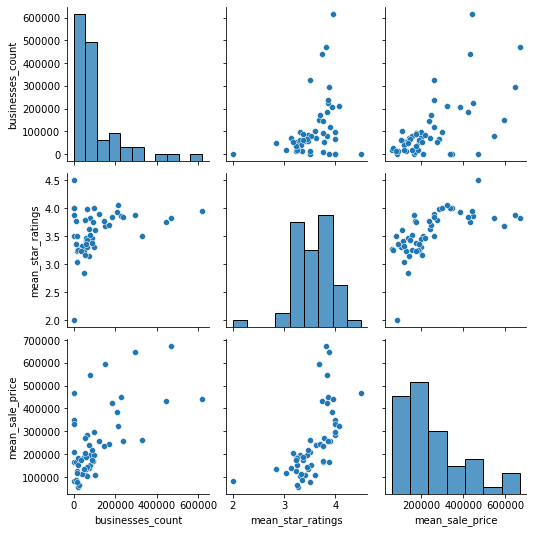

In [16]:
sns.pairplot(pc_count_rating)

In [17]:
pc_count_rating.corr()

,businesses_count,mean_star_ratings,mean_sale_price
businesses_count,1.000000,0.346552,0.623567
mean_star_ratings,0.346552,1.000000,0.619204
mean_sale_price,0.623567,0.619204,1.000000


In [18]:
count_price = stats.pearsonr(pc_count_rating.businesses_count, pc_count_rating.mean_sale_price)
rating_price = stats.pearsonr(pc_count_rating.mean_star_ratings, pc_count_rating.mean_sale_price)
print(f"(Pearson correlation coefficient, p-value) of businesses_count - mean_sale_price: {count_price} \n(Pearson correlation coefficient, p-value) of mean_star_ratings - mean_sale_price: {rating_price}")

(Pearson correlation coefficient, p-value) of businesses_count - mean_sale_price: (0.6235671609068794, 7.889606739731601e-07) 
(Pearson correlation coefficient, p-value) of mean_star_ratings - mean_sale_price: (0.6192040944732908, 9.902401614564565e-07)


Βλέπουμε ότι οι σχέσεις με τη μεγαλύτερη γραμμική συσχέτιση είναι businesses_count - mean_sale_price και mean_star_ratings - mean_sale_price για αυτό και στην συνέχεια υπολογίσαμε και τα p-values που βρήκαμε ότι είναι πολύ μικρά της τάξης του ${10^-7}$ που σημαίνει πως είναι πολύ δύσκολο οι συσχετίσεις να είναι τυχαίες, δίνοντας έτσι μεγαλύτερη αξιοτιμια στον συντελεστή συσχέτισης Pearson.

<AxesSubplot:>

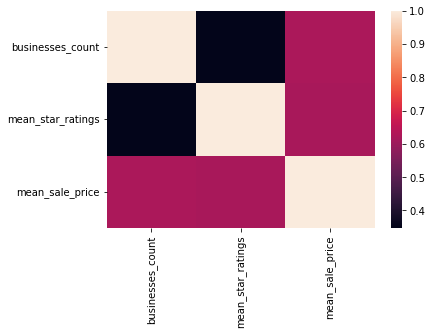

In [19]:
sns.heatmap(pc_count_rating.corr())

## Τελικά Συμπεράσματα
Μπορούμε να παρατηρήσουμε, μέτριες θετικές συσχετίσεις της τάξης του 0.6 μεταξύ των:
1.  mean_sale_price - busnesses_count   (μέσο κόστος περιοχής - πλήθος επιχειρήσεων) και
 
2.  mean_sale_price - mean_star_rating   (μέσο κόστος περιοχής - μέση κριτική καταστημάτων )

Η 1. μπορεί να εξηγηθεί με την λογική ότι η ύπαρξη πολλών επιχειρήσεων σε μια περιοχή, αυξάνει τον ανταγωνισμό για τα ακίνητα της, ανεβάζοντας έτσι το μέσο κόστος της περιοχής.   

Η 2. μπορεί να εξηγηθεί με την λογική ότι τα καταστήματα που ανοίγουν σε περιοχές με μεγαλύτερο κόστος συνήθως έχουν μεγαλύτερο budget και μπορούν να παρέχουν καλύτερες υπηρεσίες στους πελάτες τους ανεβάζοντας έτσι το μέσο rating τους. 


Η αρχική υπόθεση της άσκησης φαίνεται πως είναι σωστή.
